In [1]:
from fastai.vision.widgets import *

In [2]:
from fastai.vision.all import * 

In [3]:
path = Path('bears')

In [4]:
fns = get_image_files(path)
fns

(#522) [Path('bears/black/00000000.jpg'),Path('bears/black/00000001.png'),Path('bears/black/00000003.jpg'),Path('bears/black/00000004.jpg'),Path('bears/black/00000005.jpg'),Path('bears/black/00000006.jpg'),Path('bears/black/00000008.jpg'),Path('bears/black/00000009.jpg'),Path('bears/black/00000010.jpg'),Path('bears/black/00000012.jpg')...]

In [5]:
failed = verify_images(fns)
failed

(#0) []

In [6]:
bears = DataBlock(
            blocks = (ImageBlock, CategoryBlock),
            get_items = get_image_files,
            splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
            get_y = parent_label,
            item_tfms = Resize(128))

In [7]:
bears = bears.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5),
                 batch_tfms = aug_transforms())
dls = bears.dataloaders(path,num_workers = 0)

In [8]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.903994,0.179086,0.048077,07:22


epoch,train_loss,valid_loss,error_rate,time
0,0.178090,0.111834,0.048077,00:53
1,0.155559,0.142002,0.028846,00:24
2,0.115801,0.160118,0.028846,00:24
3,0.096208,0.160114,0.028846,00:34


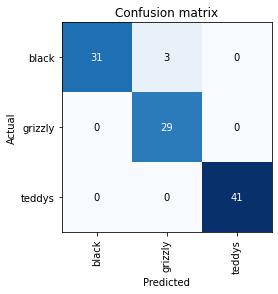

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

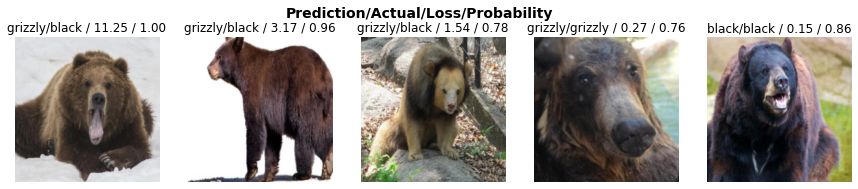

In [10]:
interp.plot_top_losses(5,nrows=1)

In [11]:
cleaner  = ImageClassifierCleaner(learn)
cleaner

In [12]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)

In [13]:
learn.export()

In [14]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [15]:
learn_inf = load_learner(path/'export.pkl')

In [16]:
learn_inf.predict('images/polarbear.jpg')

('grizzly', tensor(1), tensor([0.2898, 0.7073, 0.0030]))

In [17]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddys']

In [18]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_indx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_indx]:.04f}'

In [19]:
btn_run = widgets.Button(description = 'Classify')
btn_run.on_click(on_click_classify)

lbl_pred = widgets.Label()
out_pl = widgets.Output()
btn_upload = widgets.FileUpload()

In [20]:
VBox([widgets.Label('select an image..'), btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
pip install voila

In [ ]:
!jupyter serverextension enable --sys-prefix voila